In [1]:
from subpred.protein_go_datasets import get_transmembrane_transporter_dataset, get_stats, get_interpro_annotations

## Parameters

In [2]:
import pandas as pd
pd.set_option('display.max_rows', 100)

In [3]:
ORGANISMS = [3702]  # athaliana 3702 yeast 559292 human 9606 ecoli 83333
GO_TERMS_CLASSES = [
    "sugar transmembrane transporter activity",
    "amino acid transmembrane transporter activity",
]
IDENTITY_THRESHOLD = 70
TEST_NAME = "svc_at_sugaramino"
# TODO pathlib
FEATURES_FOLDER = "../data/tmp_data/"  # to share between environments
RESULTS_FOLDER = "../data/results/"
RECALCULATE_RESULTS = False  # If false, use cached results, e.g. to create more plots

## Full dataset

In [4]:
# Get full dataset for stats. Dataset for analysis is created in cell below.
dataset_unfiltered = get_transmembrane_transporter_dataset(
    organism_ids=ORGANISMS,
    swissprot_only=False,
    datasets_path="../data/datasets/",
    exclude_iea_go_terms=False,
    max_sequence_evidence_code=2,
    remove_proteins_without_gene_names=False,
)
get_stats(*dataset_unfiltered)

cd-hit: clustered 1773 sequences into 646 clusters at threshold 50
cd-hit: clustered 1773 sequences into 923 clusters at threshold 70
cd-hit: clustered 1773 sequences into 1203 clusters at threshold 90
cd-hit: clustered 1773 sequences into 1554 clusters at threshold 100


n_transporters  \
swissprot_reviewed has_gene_name go_evidence   protein_existence_evidence clustering                   
False              False         computational protein_level              100                      3   
                                                                          None                     3   
                                               transcript_level           50                       3   
                                                                          70                       4   
                                                                          90                       7   
                                                                          100                     37   
                                                                          None                    49   
                   True          computational protein_level              50                      87   
                                                                          70                     114   
                                                                          90                     153   
                                                                          100                    329   
                                                                          None                   433   
                                               transcript_level           50                       7   
                                                                          70                      13   
                                                                          90                      19   
                                                                          100                     84   
                                                                          None                   164   
                                 experiment    protein_level              50                      25   
                                                                          70                      33   
                                                                          90                      38   
                                                                          100                     41   
                                                                          None                    42   
                                               transcript_level           50                       3   
                                                                          70                       5   
                                                                          90                       5   
                                                                          100                      6   
                                                                          None                     6   
True               True          computational protein_level              50                     206   
                                                                          70                     287   
                                                                          90                     370   
                                                                          100                    408   
                                                                          None                   418   
                                               transcript_level           50                     208   
                                                                          70                     338   
                                                                          90                     462   
                                                                          100                    492   
                                                                          None                   504   
                              

## Filtered Subset

In [5]:
dataset_organism = get_transmembrane_transporter_dataset(  # organism
    organism_ids=ORGANISMS,
    swissprot_only=True,
    datasets_path="../data/datasets/",
    exclude_iea_go_terms=True,
    max_sequence_evidence_code=1,
    remove_proteins_without_gene_names=True,
)
get_stats(*dataset_organism)

cd-hit: clustered 420 sequences into 276 clusters at threshold 50
cd-hit: clustered 420 sequences into 344 clusters at threshold 70
cd-hit: clustered 420 sequences into 403 clusters at threshold 90
cd-hit: clustered 420 sequences into 419 clusters at threshold 100


n_transporters  \
swissprot_reviewed has_gene_name go_evidence protein_existence_evidence clustering                   
True               True          experiment  protein_level              50                     276   
                                                                        70                     344   
                                                                        90                     403   
                                                                        100                    419   
                                                                        None                   420   

                                                                                    n_terms  
swissprot_reviewed has_gene_name go_evidence protein_existence_evidence clustering           
True               True          experiment  protein_level              50              264  
                                                                        70              281  
                                                                        90              288  
                                                                        100             288  
                                                                        None            288

## Sugar/Amino subset

In [6]:
from subpred.dataset_filters import get_classification_subset

dataset_organism = get_classification_subset(
    dataset_full=dataset_organism, go_terms=GO_TERMS_CLASSES
)

print("before clustering:")
dataset_organism[1].go_term_ancestor.value_counts()

before clustering:


go_term_ancestor
amino acid transmembrane transporter activity    33
sugar transmembrane transporter activity         32
Name: count, dtype: int64

In [7]:
from subpred.dataset_filters import filter_no_3Di_available

dataset_organism = filter_no_3Di_available(dataset_organism)
dataset_organism[1].go_term_ancestor.value_counts()

go_term_ancestor
amino acid transmembrane transporter activity    33
sugar transmembrane transporter activity         32
Name: count, dtype: int64

Clustering at 70%

In [8]:
from subpred.dataset_filters import cluster_sequences

dataset_organism = cluster_sequences(
    dataset_full=dataset_organism, identity_threshold=IDENTITY_THRESHOLD
)
dataset_organism[1].go_term_ancestor.value_counts()

cd-hit: clustered 65 sequences into 54 clusters at threshold 70


go_term_ancestor
sugar transmembrane transporter activity         28
amino acid transmembrane transporter activity    26
Name: count, dtype: int64

### Interpro annotations

In [9]:
from subpred.protein_go_datasets import count_interpro_annotations, get_interpro_table

count_interpro_annotations(dataset_organism[1], GO_TERMS_CLASSES)

######## sugar transmembrane transporter activity ########
Family
Sugar transporter SWEET                                      13
Sugar/inositol transporter                                   12
Major facilitator, sugar transporter-like                    12
Sugar transport protein STP/Polyol transporter PLT, plant     8
Sugar transport protein STP/MST-like, plant                   7
Major Facilitator Superfamily Trehalose Transporter           2
Sugar transporter ERD6/Tret1-like                             2
Major Facilitator Superfamily Sugar Transporter               2
Major facilitator superfamily                                 2
Solute carrier family 17 member 9-like                        1
Major Facilitator Superfamily Sodium/Anion Cotransporter      1
Polyol transporter 1-6                                        1
Triose Phosphate/Phosphate Translocator                       1
Sucrose/H+ symporter, plant                                   1
Name: count, dtype: int64

Domain
Majo

In [10]:
# Some proteins have multiple rows!
get_interpro_table(
    *dataset_organism,
    go_terms=["sugar transmembrane transporter activity"],
    interpro_types=["Family", "Homologous_superfamily"]
)

,Uniprot,go_term_ancestor,protein_names,Family,Homologous_superfamily
0,O04036,sugar transmembrane transporter activity,Sugar transporter ERD6 (Early-responsive to de...,Sugar/inositol transporter,MFS transporter superfamily
1,O04036,sugar transmembrane transporter activity,Sugar transporter ERD6 (Early-responsive to de...,Major Facilitator Superfamily Trehalose Transp...,MFS transporter superfamily
2,O04036,sugar transmembrane transporter activity,Sugar transporter ERD6 (Early-responsive to de...,"Major facilitator, sugar transporter-like",MFS transporter superfamily
3,O04036,sugar transmembrane transporter activity,Sugar transporter ERD6 (Early-responsive to de...,Sugar transporter ERD6/Tret1-like,MFS transporter superfamily
4,O04249,sugar transmembrane transporter activity,Sugar transport protein 7 (Hexose transporter 7),Sugar transport protein STP/Polyol transporter...,MFS transporter superfamily
5,O04249,sugar transmembrane transporter activity,Sugar transport protein 7 (Hexose transporter 7),Sugar/inositol transporter,MFS transporter superfamily
6,O04249,sugar transmembrane transporter activity,Sugar transport protein 7 (Hexose transporter 7),"Sugar transport protein STP/MST-like, plant",MFS transporter superfamily
7,O04249,sugar transmembrane transporter activity,Sugar transport protein 7 (Hexose transporter 7),"Major facilitator, sugar transporter-like",MFS transporter superfamily
8,P23586,sugar transmembrane transporter activity,Sugar transport protein 1 (Glucose transporter...,"Sugar transport protein STP/MST-like, plant",MFS transporter superfamily
9,P23586,sugar transmembrane transporter activity,Sugar transport protein 1 (Glucose transporter...,"Major facilitator, sugar transporter-like",MFS transporter superfamily


In [11]:
# Some proteins have multiple rows!
get_interpro_table(
    *dataset_organism,
    go_terms=["amino acid transmembrane transporter activity"],
    interpro_types=["Family", "Homologous_superfamily", "Domain"]
)

,Uniprot,go_term_ancestor,protein_names,Family,Homologous_superfamily,Domain
0,F4HW02,amino acid transmembrane transporter activity,GABA transporter 1 (AtGAT1) (Bidirectional ami...,NaN,NaN,"Amino acid transporter, transmembrane domain"
1,F4IUW3,amino acid transmembrane transporter activity,Amino acid transporter AVT1C (AtAvt1C),NaN,NaN,"Amino acid transporter, transmembrane domain"
2,O64759,amino acid transmembrane transporter activity,Cationic amino acid transporter 5,Amino acid/polyamine transporter I,NaN,"Cationic amino acid transporter, C-terminal"
3,O81845,amino acid transmembrane transporter activity,Mitochondrial uncoupling protein 1 (AtPUMP1),Mitochondrial carrier protein,Mitochondrial carrier domain superfamily,NaN
4,O81845,amino acid transmembrane transporter activity,Mitochondrial uncoupling protein 1 (AtPUMP1),Mitochondrial Metabolite Transporter,Mitochondrial carrier domain superfamily,NaN
5,P57758,amino acid transmembrane transporter activity,Cystinosin homolog,Lysosomal cystine transporter,NaN,NaN
6,P92961,amino acid transmembrane transporter activity,Proline transporter 1 (AtPROT1),NaN,NaN,"Amino acid transporter, transmembrane domain"
7,Q38967,amino acid transmembrane transporter activity,Amino acid permease 2 (Amino acid transporter ...,NaN,NaN,"Amino acid transporter, transmembrane domain"
8,Q42400,amino acid transmembrane transporter activity,Amino acid permease 1 (Amino acid transporter ...,NaN,NaN,"Amino acid transporter, transmembrane domain"
9,Q84MA5,amino acid transmembrane transporter activity,Cationic amino acid transporter 1 (Amino acid ...,Amino acid/polyamine transporter I,NaN,"Cationic amino acid transporter, C-terminal"


## Feature generation

In [12]:
from subpred.features import get_features

features_list, series_labels = get_features(dataset_full=dataset_organism)

2025-06-04 13:58:17.267133: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-04 13:58:17.278156: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749038297.294768    8356 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749038297.299184    8356 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-04 13:58:17.312879: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

For each Feature: Outlier detection, numpy conversion 

In [13]:
from subpred.features import get_ml_datasets

ml_datasets = list(
    get_ml_datasets(features_list=features_list, series_labels=series_labels)
)
ml_datasets

[Name: DUMMY, Features: 1024, Samples: 54, Classes: [0 1], Labels: ['amino acid transmembrane transporter activity'
  'sugar transmembrane transporter activity']),
 Name: AAC, Features: 20, Samples: 54, Classes: [0 1], Labels: ['amino acid transmembrane transporter activity'
  'sugar transmembrane transporter activity']),
 Name: PAAC, Features: 400, Samples: 54, Classes: [0 1], Labels: ['amino acid transmembrane transporter activity'
  'sugar transmembrane transporter activity']),
 Name: AA_KMER3, Features: 8000, Samples: 54, Classes: [0 1], Labels: ['amino acid transmembrane transporter activity'
  'sugar transmembrane transporter activity']),
 Name: 3Di_COMP, Features: 20, Samples: 54, Classes: [0 1], Labels: ['amino acid transmembrane transporter activity'
  'sugar transmembrane transporter activity']),
 Name: 3Di_KMER2, Features: 400, Samples: 54, Classes: [0 1], Labels: ['amino acid transmembrane transporter activity'
  'sugar transmembrane transporter activity']),
 Name: 3Di_KMER

In [14]:
# saving as pickle, to load in different notebook with different env,
# as tensorflow on GPU has problems with current CUDA version (too new)
import pickle

with open(f"{FEATURES_FOLDER}{TEST_NAME}_ml_data.pickle", "wb") as handle:
    pickle.dump(ml_datasets, handle)

## Outliers

In [16]:
from subpred.evaluation import outlier_check

df_outliers = outlier_check(dataset_full=dataset_organism, ml_datasets=ml_datasets, threshold=0.5)
df_outliers#[df_outliers.outlier_count>df_outliers.outlier_count.quantile(0.95)]

,outlier_count,protein_names,go_term_ancestor
Uniprot,,,
Q9ZV24,12,"Outer envelope pore protein 16-1, chloroplasti...",amino acid transmembrane transporter activity
Q9C8E7,10,Glutamate receptor 3.3 (AtGLR3.3) (Glutamate r...,amino acid transmembrane transporter activity
P57758,10,Cystinosin homolog,amino acid transmembrane transporter activity


## Model evaluation SVM

In [17]:
ml_datasets[0]

Name: DUMMY, Features: 1024, Samples: 54, Classes: [0 1], Labels: ['amino acid transmembrane transporter activity'
 'sugar transmembrane transporter activity'])

In [18]:
from subpred.evaluation import (
    get_svm_results,
    plot_results_long,
    summarize_results_long,
)
from sklearn.metrics import f1_score, make_scorer

scoring_outer = {
    "Balanced Accuracy": "balanced_accuracy",
    "F1 Macro": "f1_macro",
    "F1 Amino Acid": make_scorer(
        f1_score, pos_label=0
    ),  # labels are encoded in lex. order
    "F1 Sugar": make_scorer(f1_score, pos_label=1),
}

df_results_long = get_svm_results(
    ml_datasets=ml_datasets,
    recalculate=RECALCULATE_RESULTS,
    output_folder=RESULTS_FOLDER,
    test_name=TEST_NAME,
    inner_cv=5,
    outer_cv=5,
    repeats=5,
    n_jobs_inner=1,
    n_jobs_outer=-1,
    scoring_inner="balanced_accuracy",
    scoring_outer=scoring_outer,
)
# df_results_long

### Results for all features

In [19]:
df_summary = summarize_results_long(df_results_long=df_results_long)
df_summary

Mean    Median      Sdev
Feature     Metric                                         
3Di_COMP    Balanced Accuracy  0.928667  1.000000  0.105795
            F1 Amino Acid      0.917091  1.000000  0.127139
            F1 Macro           0.926710  1.000000  0.108421
            F1 Sugar           0.936329  1.000000  0.090991
3Di_KMER2   Balanced Accuracy  0.970667  1.000000  0.043906
            F1 Amino Acid      0.969293  1.000000  0.045964
            F1 Macro           0.969573  1.000000  0.045351
            F1 Sugar           0.969852  1.000000  0.045281
3Di_KMER3   Balanced Accuracy  0.920000  0.916667  0.054220
            F1 Amino Acid      0.915671  0.909091  0.057837
            F1 Macro           0.917984  0.909091  0.055374
            F1 Sugar           0.920298  0.909091  0.054709
AAC         Balanced Accuracy  0.711333  0.733333  0.159260
            F1 Amino Acid      0.705371  0.727273  0.152135
            F1 Macro           0.702667  0.727273  0.169217
            F1 Sugar           0.699964  0.727273  0.202053
AA_KMER3    Balanced Accuracy  0.882667  0.900000  0.081859
            F1 Amino Acid      0.883142  0.909091  0.079634
            F1 Macro           0.876427  0.905983  0.087873
            F1 Sugar           0.869711  0.909091  0.098787
COMB_KMER1  Balanced Accuracy  0.896667  0.900000  0.082074
            F1 Amino Acid      0.894225  0.909091  0.083551
            F1 Macro           0.893926  0.905983  0.083544
            F1 Sugar           0.893627  0.909091  0.088088
COMB_KMER2  Balanced Accuracy  0.907333  0.916667  0.078922
            F1 Amino Acid      0.907975  0.909091  0.076420
            F1 Macro           0.902782  0.909091  0.083189
            F1 Sugar           0.897590  0.909091  0.091888
COMB_KMER3  Balanced Accuracy  0.946667  1.000000  0.071686
            F1 Amino Acid      0.946977  1.000000  0.072213
            F1 Macro           0.944277  1.000000  0.075033
            F1 Sugar           0.941576  1.000000  0.078370
DUMMY       Balanced Accuracy  0.462667  0.433333  0.122312
            F1 Amino Acid      0.393201  0.363636  0.170824
            F1 Macro           0.451262  0.410714  0.126191
            F1 Sugar           0.509322  0.500000  0.117866
META        Balanced Accuracy  0.818000  0.816667  0.134019
            F1 Amino Acid      0.812814  0.833333  0.138915
            F1 Macro           0.810439  0.816667  0.140658
            F1 Sugar           0.808065  0.800000  0.152844
META_STD    Balanced Accuracy  0.868667  0.900000  0.124566
            F1 Amino Acid      0.866151  0.909091  0.128936
            F1 Macro           0.865063  0.905983  0.127192
            F1 Sugar           0.863975  0.909091  0.128261
PAAC        Balanced Accuracy  0.892000  0.900000  0.086752
            F1 Amino Acid      0.893041  0.909091  0.085903
            F1 Macro           0.887063  0.905983  0.090960
            F1 Sugar           0.881085  0.909091  0.099110
PROSTT5_3DI Balanced Accuracy  0.909333  0.900000  0.073924
            F1 Amino Acid      0.898929  0.909091  0.087308
            F1 Macro           0.908142  0.905983  0.075489
            F1 Sugar           0.917355  0.909091  0.066668
PROSTT5_AA  Balanced Accuracy  0.913333  0.916667  0.079349
            F1 Amino Acid      0.902130  0.909091  0.101736
            F1 Macro           0.911546  0.909091  0.080530
            F1 Sugar           0.920963  0.909091  0.064273
PROTT5_AA   Balanced Accuracy  0.910000  0.900000  0.057935
            F1 Amino Acid      0.900162  0.909091  0.069704
            F1 Macro           0.908795  0.905983  0.058178
            F1 Sugar           0.917429  0.909091  0.049439
PSSM_50_1   Balanced Accuracy  0.747333  0.750000  0.102479
            F1 Amino Acid      0.721577  0.750000  0.130031
            F1 Macro           0.735337  0.727273  0.111158
            F1 Sugar           0.749098  0.769231  0.118417
PSSM_50_3   Balanced Accuracy  0.820000  0.833333  0.119315
            F1 

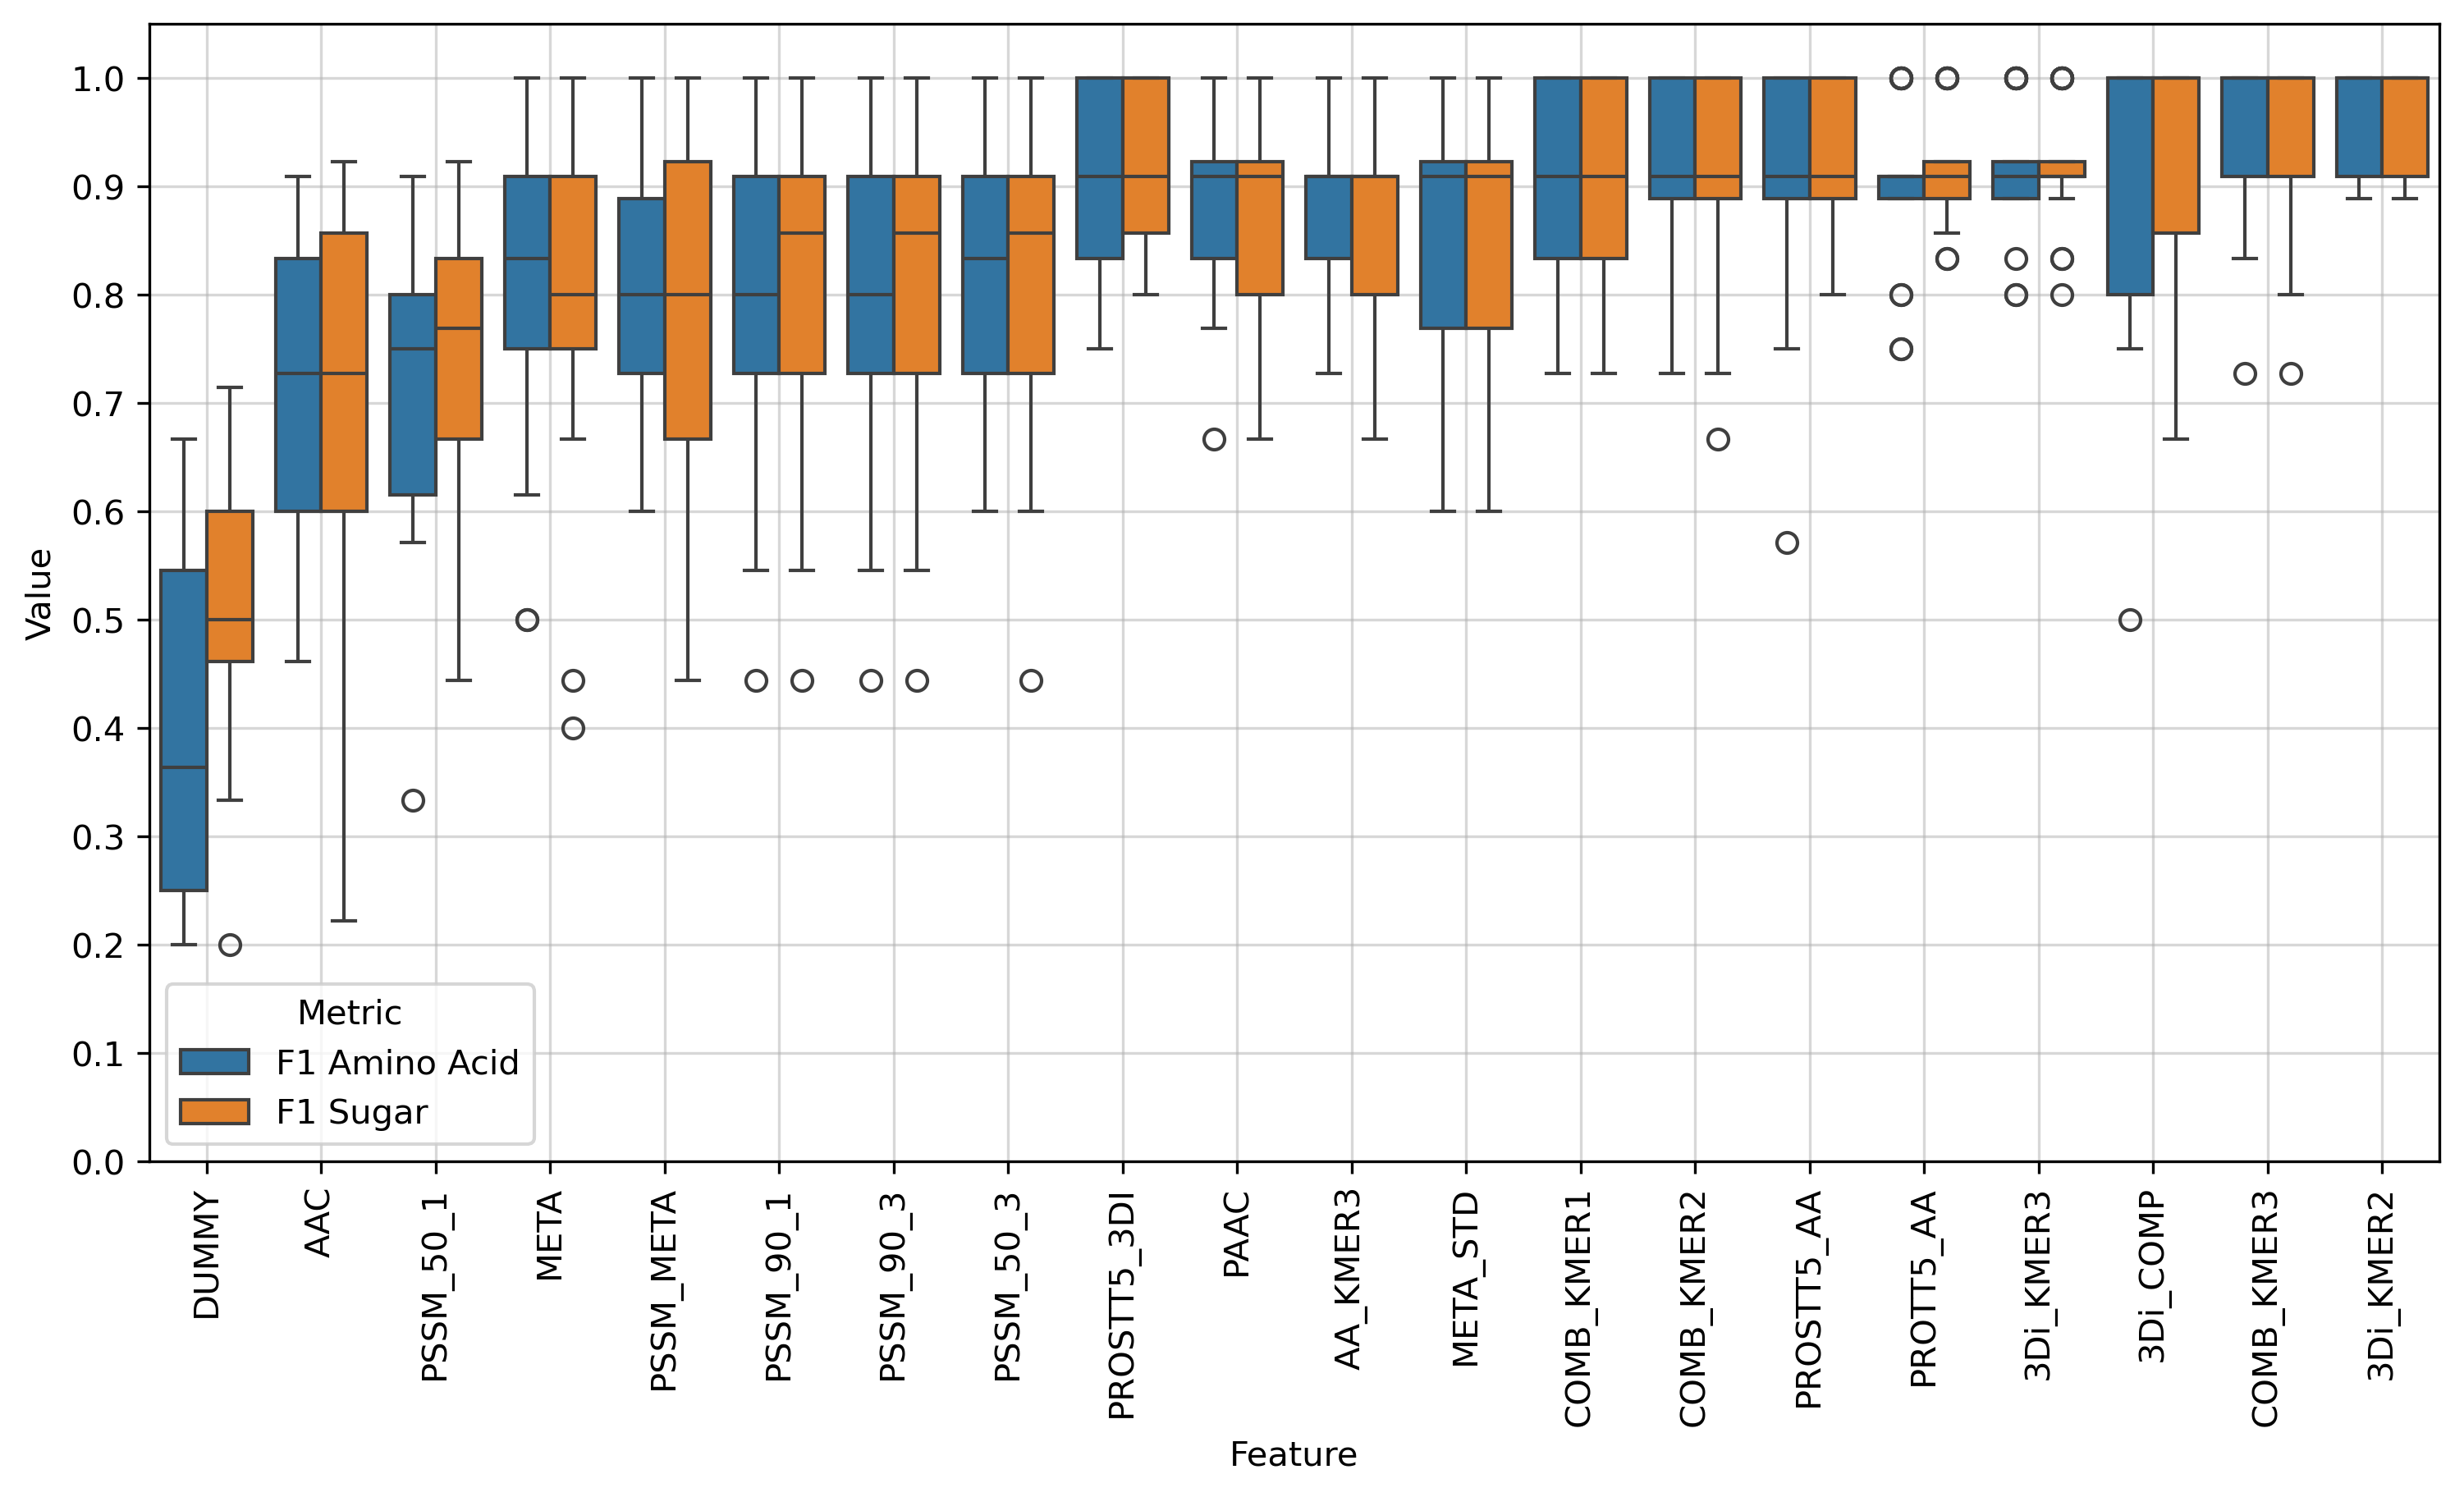

In [20]:
plot_results_long(
    df_results_long=df_results_long,
    output_folder_path=RESULTS_FOLDER,
    test_name=TEST_NAME,
    metrics_include=["F1 Amino Acid", "F1 Sugar"],
    figsize=(12, 6),
)

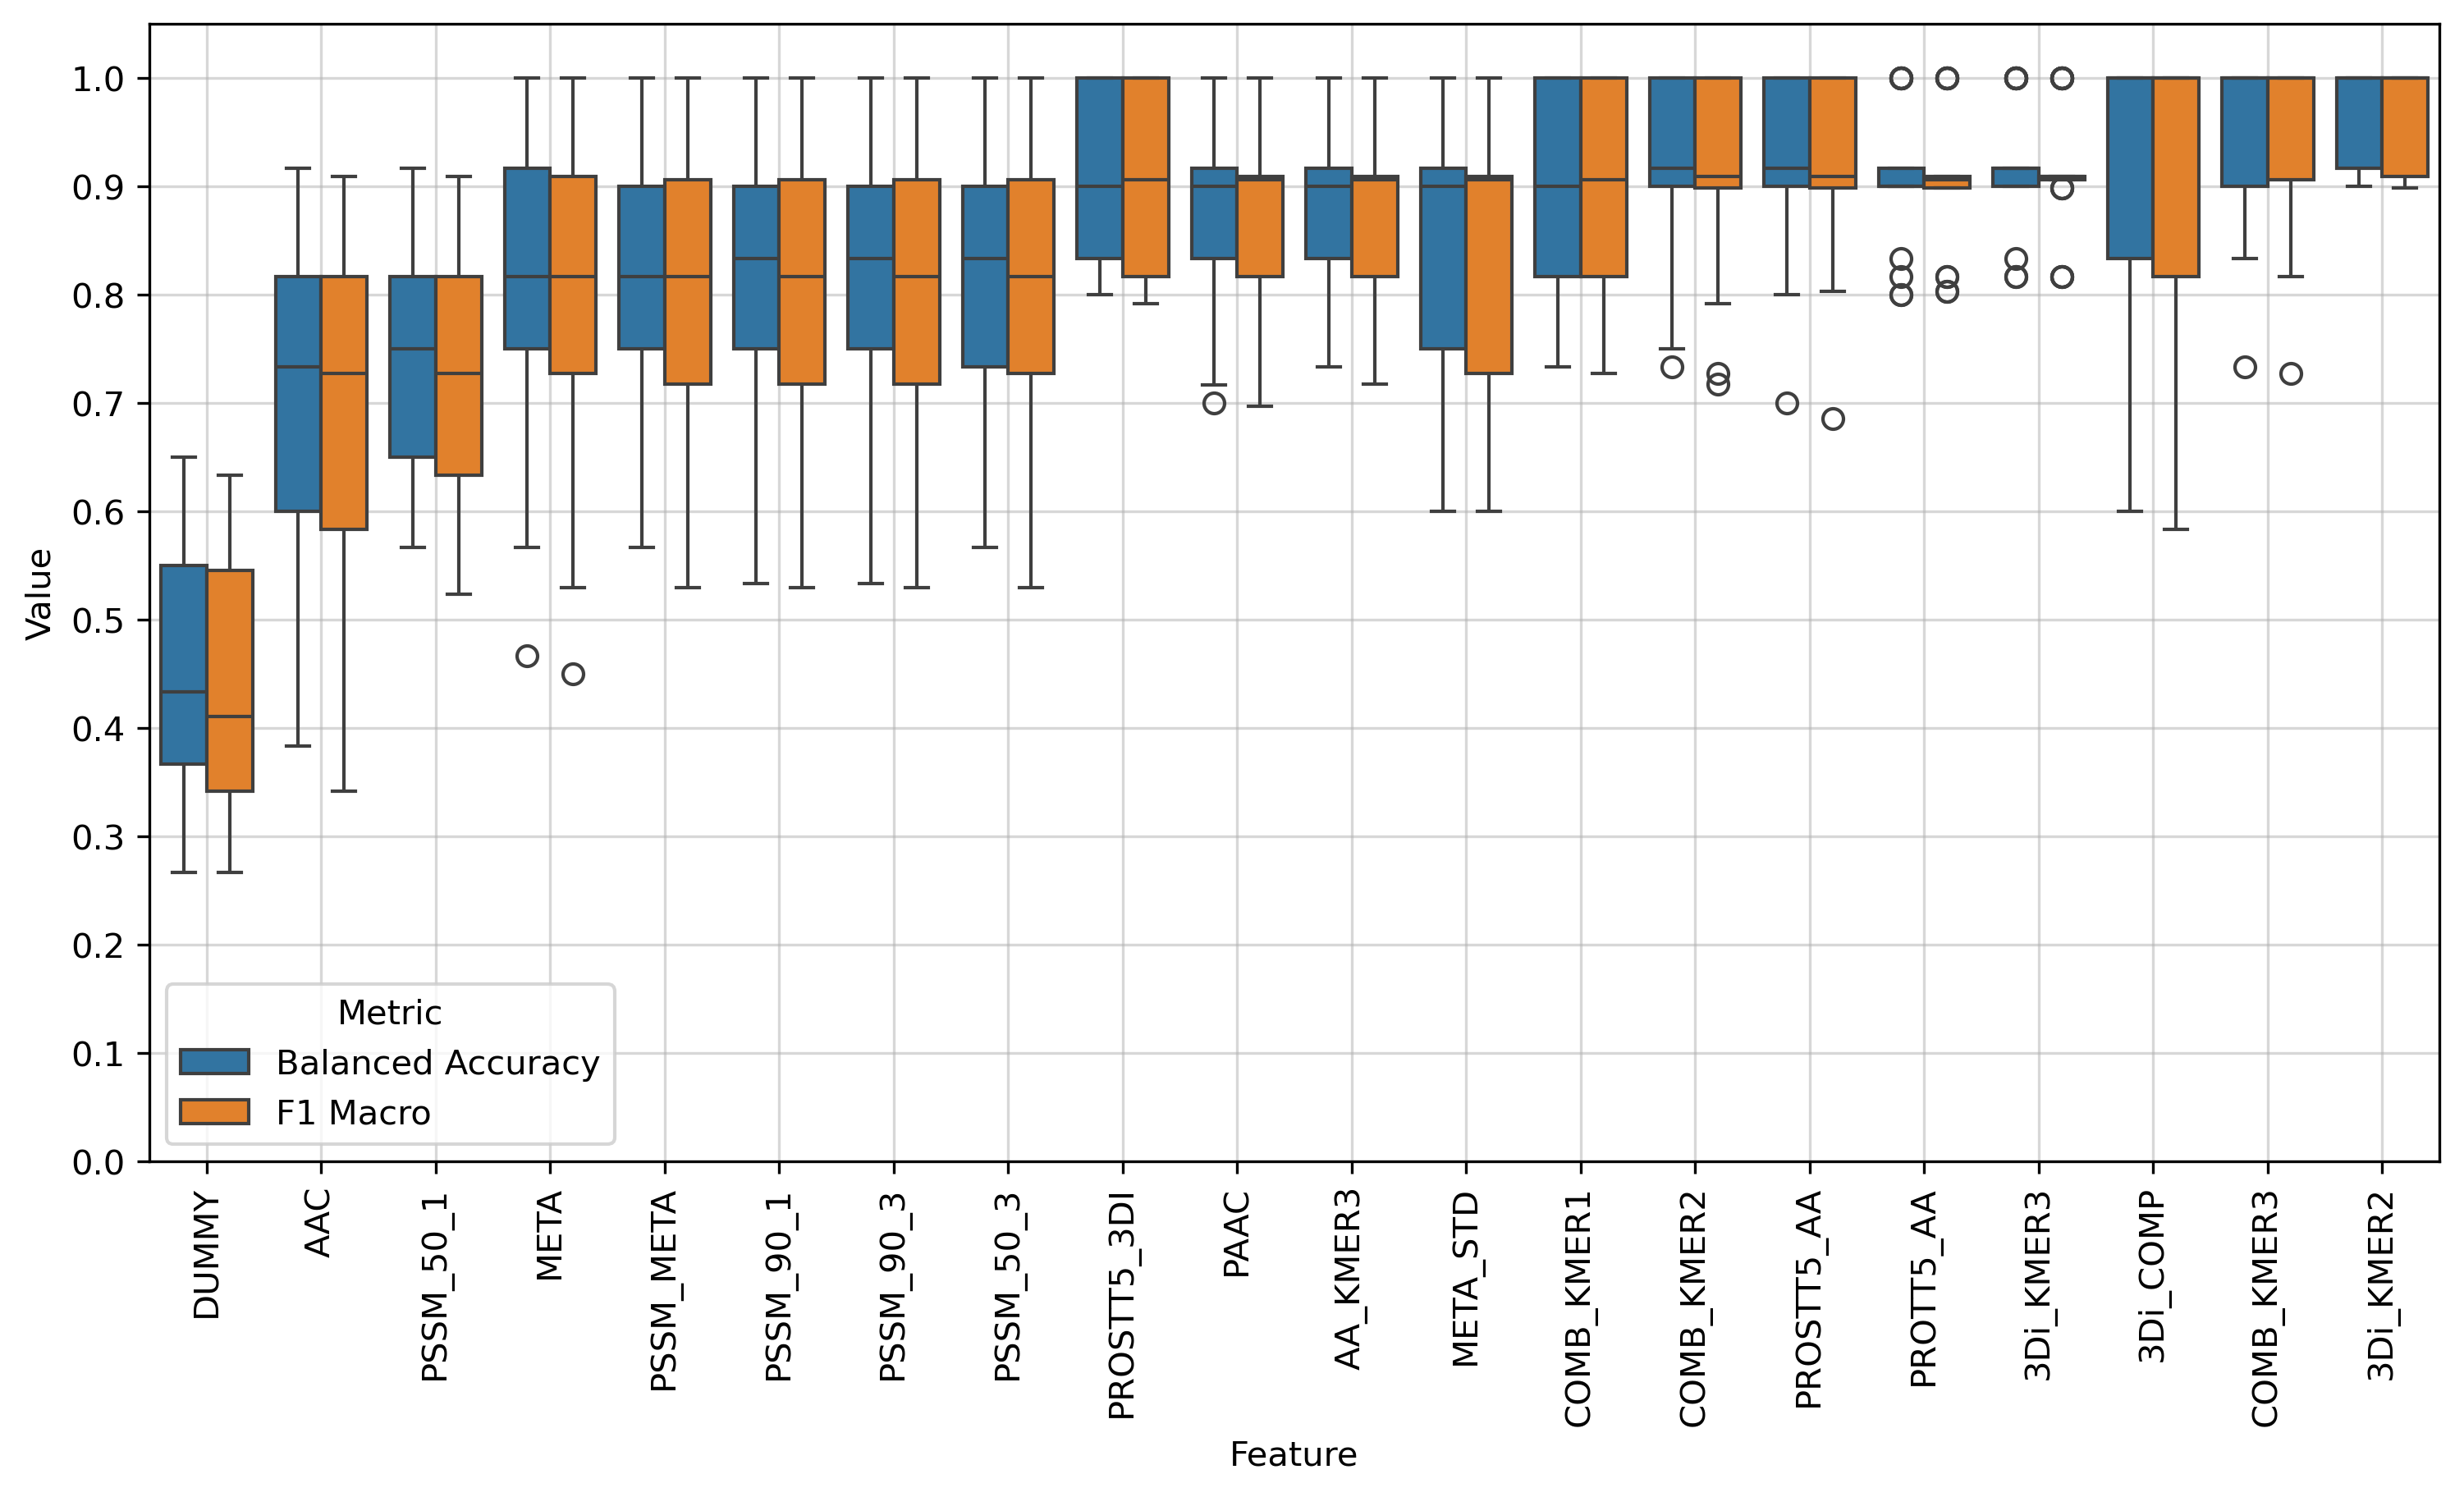

In [21]:
plot_results_long(
    df_results_long=df_results_long,
    output_folder_path=RESULTS_FOLDER,
    test_name=TEST_NAME,
    metrics_include=["F1 Macro", "Balanced Accuracy"],
)

### Generating tables and plots for paper

In [100]:
df_results_long_plots = df_results_long.copy()
df_results_long_plots["Feature"] =  df_results_long_plots["Feature"].replace("PSSM_META", "MULTI_PSSM").replace("PROSTT5_3DI","PROSTT5_3Di")

In [101]:
feature_names = [
    "DUMMY",
    "AAC",
    "PAAC",
    "AA_KMER3",
    # "PSSM_META",
    "MULTI_PSSM",
    "META",
    "META_STD",
    # "COMB_KMER1",
    # "COMB_KMER2",
    # "COMB_KMER3",
    "PROTT5_AA",
    "PROSTT5_AA",
    # "PROSTT5_3DI",
    "PROSTT5_3Di",
    "3Di_COMP",
    "3Di_KMER2",
    "3Di_KMER3",
    # "PSSM_50_1",
    # "PSSM_50_3",
    # "PSSM_90_1",
    # "PSSM_90_3",
]
df_results_long_filtered = df_results_long_plots[df_results_long_plots.Feature.isin(feature_names)]

In [102]:
df_results_long_filtered.Feature = df_results_long_filtered.Feature.str.replace("_","-")
feature_names = [feature_name.replace("_","-") for feature_name in feature_names]

/tmp/ipykernel_3081/4214513801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results_long_filtered.Feature = df_results_long_filtered.Feature.str.replace("_","-")


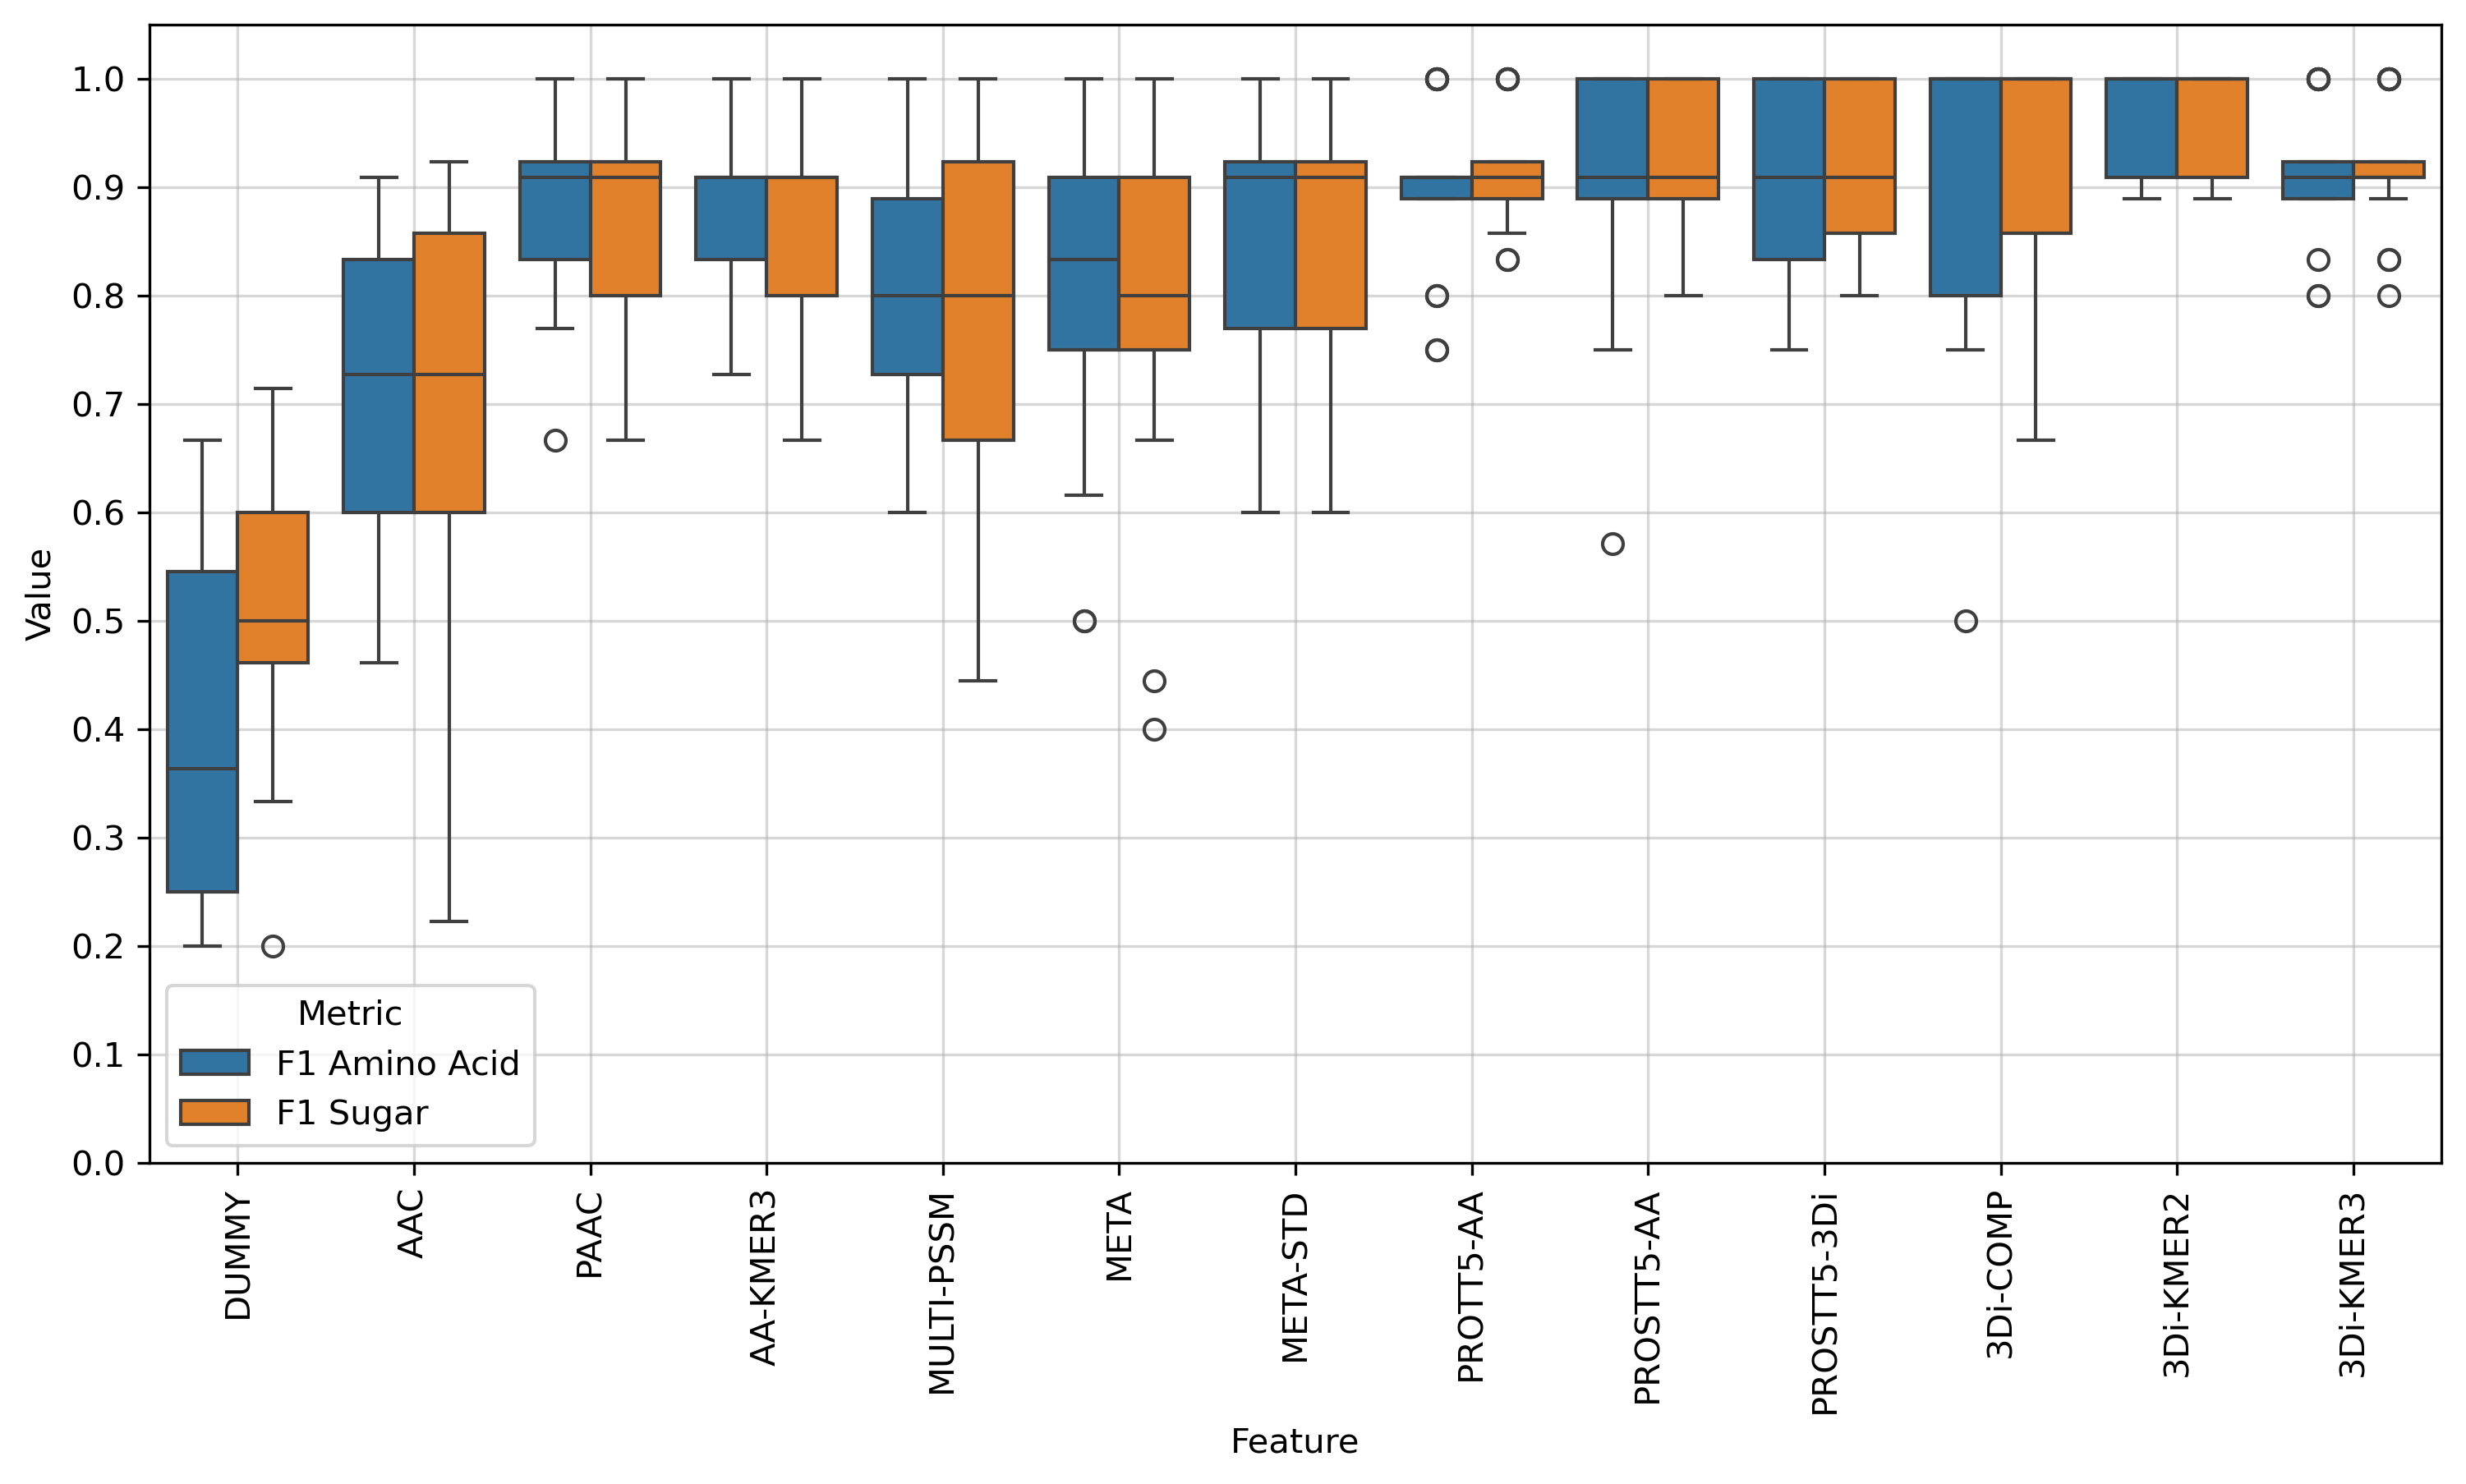

In [103]:
plot_results_long(
    df_results_long=df_results_long_filtered,
    output_folder_path=RESULTS_FOLDER,
    test_name=TEST_NAME+"_filtered",
    metrics_include=["F1 Amino Acid", "F1 Sugar"],
    figsize=(12, 6),
    y_max=1.05,
    plot_order=feature_names,
    plot_type="box"
)

### Tables

In [104]:
df_table = df_summary.copy().round(3)
df_table = df_table.reset_index()
df_table = df_table[df_table.Metric != "F1 Macro"]
df_table = df_table.pivot(columns="Metric", index="Feature", values=[ "Mean", "Sdev"])
df_table.columns = df_table.columns.swaplevel(0,1)
df_table = df_table[df_table.columns.sort_values()]
df_table.index = df_table.index.str.replace("PSSM_META","MULTI_PSSM").str.replace("PROSTT5_3DI","PROSTT5_3Di")

feature_names = [
    "DUMMY",
    "AAC",
    "PAAC",
    "AA_KMER3",
    # "PSSM_META",
    "MULTI_PSSM",
    "META",
    "META_STD",
    "COMB_KMER1",
    "COMB_KMER2",
    "COMB_KMER3",
    "PROTT5_AA",
    "PROSTT5_AA",
    "PROSTT5_3Di",
    "3Di_COMP",
    "3Di_KMER2",
    "3Di_KMER3",
    # "PSSM_50_1",
    # "PSSM_50_3",
    # "PSSM_90_1",
    # "PSSM_90_3",
]

df_table_filtered = df_table.loc[feature_names]
df_table_filtered

Metric      Balanced Accuracy        F1 Amino Acid        F1 Sugar       
                         Mean   Sdev          Mean   Sdev     Mean   Sdev
Feature                                                                  
DUMMY                   0.463  0.122         0.393  0.171    0.509  0.118
AAC                     0.711  0.159         0.705  0.152    0.700  0.202
PAAC                    0.892  0.087         0.893  0.086    0.881  0.099
AA_KMER3                0.883  0.082         0.883  0.080    0.870  0.099
MULTI_PSSM              0.816  0.122         0.815  0.118    0.799  0.153
META                    0.818  0.134         0.813  0.139    0.808  0.153
META_STD                0.869  0.125         0.866  0.129    0.864  0.128
COMB_KMER1              0.897  0.082         0.894  0.084    0.894  0.088
COMB_KMER2              0.907  0.079         0.908  0.076    0.898  0.092
COMB_KMER3              0.947  0.072         0.947  0.072    0.942  0.078
PROTT5_AA               0.910  0.058         0.900  0.070    0.917  0.049
PROSTT5_AA              0.913  0.079         0.902  0.102    0.921  0.064
PROSTT5_3Di             0.909  0.074         0.899  0.087    0.917  0.067
3Di_COMP                0.929  0.106         0.917  0.127    0.936  0.091
3Di_KMER2               0.971  0.044         0.969  0.046    0.970  0.045
3Di_KMER3               0.920  0.054         0.916  0.058    0.920  0.055

In [105]:
df_table_filtered_latex = df_table_filtered.copy()
df_table_filtered_latex.index = df_table_filtered_latex.index.str.replace("_", "-")
df_table_filtered_latex

Metric      Balanced Accuracy        F1 Amino Acid        F1 Sugar       
                         Mean   Sdev          Mean   Sdev     Mean   Sdev
Feature                                                                  
DUMMY                   0.463  0.122         0.393  0.171    0.509  0.118
AAC                     0.711  0.159         0.705  0.152    0.700  0.202
PAAC                    0.892  0.087         0.893  0.086    0.881  0.099
AA-KMER3                0.883  0.082         0.883  0.080    0.870  0.099
MULTI-PSSM              0.816  0.122         0.815  0.118    0.799  0.153
META                    0.818  0.134         0.813  0.139    0.808  0.153
META-STD                0.869  0.125         0.866  0.129    0.864  0.128
COMB-KMER1              0.897  0.082         0.894  0.084    0.894  0.088
COMB-KMER2              0.907  0.079         0.908  0.076    0.898  0.092
COMB-KMER3              0.947  0.072         0.947  0.072    0.942  0.078
PROTT5-AA               0.910  0.058         0.900  0.070    0.917  0.049
PROSTT5-AA              0.913  0.079         0.902  0.102    0.921  0.064
PROSTT5-3Di             0.909  0.074         0.899  0.087    0.917  0.067
3Di-COMP                0.929  0.106         0.917  0.127    0.936  0.091
3Di-KMER2               0.971  0.044         0.969  0.046    0.970  0.045
3Di-KMER3               0.920  0.054         0.916  0.058    0.920  0.055

In [ ]:
metrics = df_table_filtered_latex.columns.get_level_values(0).unique()
print(metrics)
df_table_filtered_latex2 = pd.concat(
    [
        (
            df_table_filtered_latex[(metric, "Mean")]
            .map(lambda x: f"{x:.3f}")
            .astype(str)
            + "±"
            + df_table_filtered_latex[(metric, "Sdev")]
            .map(lambda x: f"{x:.3f}")
            .astype(str)
        ).rename(metric)
        for metric in metrics
    ],
    axis=1,
)
print(df_table_filtered_latex2.to_latex())

Index(['Balanced Accuracy', 'F1 Amino Acid', 'F1 Sugar'], dtype='object', name='Metric')
\begin{tabular}{llll}
\toprule
 & Balanced Accuracy & F1 Amino Acid & F1 Sugar \\
Feature &  &  &  \\
\midrule
DUMMY & 0.463±0.122 & 0.393±0.171 & 0.509±0.118 \\
AAC & 0.711±0.159 & 0.705±0.152 & 0.700±0.202 \\
PAAC & 0.892±0.087 & 0.893±0.086 & 0.881±0.099 \\
AA-KMER3 & 0.883±0.082 & 0.883±0.080 & 0.870±0.099 \\
MULTI-PSSM & 0.816±0.122 & 0.815±0.118 & 0.799±0.153 \\
META & 0.818±0.134 & 0.813±0.139 & 0.808±0.153 \\
META-STD & 0.869±0.125 & 0.866±0.129 & 0.864±0.128 \\
COMB-KMER1 & 0.897±0.082 & 0.894±0.084 & 0.894±0.088 \\
COMB-KMER2 & 0.907±0.079 & 0.908±0.076 & 0.898±0.092 \\
COMB-KMER3 & 0.947±0.072 & 0.947±0.072 & 0.942±0.078 \\
PROTT5-AA & 0.910±0.058 & 0.900±0.070 & 0.917±0.049 \\
PROSTT5-AA & 0.913±0.079 & 0.902±0.102 & 0.921±0.064 \\
PROSTT5-3Di & 0.909±0.074 & 0.899±0.087 & 0.917±0.067 \\
3Di-COMP & 0.929±0.106 & 0.917±0.127 & 0.936±0.091 \\
3Di-KMER2 & 0.971±0.044 & 0.969±0.046 & 0.970±